# 송인욱 과제 2

## 데이터 전처리

In [220]:
# 데이터 불러오기
import pandas as pd
import matplotlib.pyplot as plt

data = {
    'year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
    'month': [12,11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
    'interest_rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,
    1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
    'unemployment_rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,
    5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
    'index_price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,
    1047,965,943,958,971,949,884,866,876,822,704,719]
}

df = pd.DataFrame(data)
print

<function print>

In [221]:
# 데이터 전처리
import numpy as np

interest = np.array(df["interest_rate"])
index_price = np.array(df["index_price"])
unemployment = np.array(df["unemployment_rate"])

## 이자율과 물가지수 상관관계 분석

### 산점도 그려서 데이터 확인

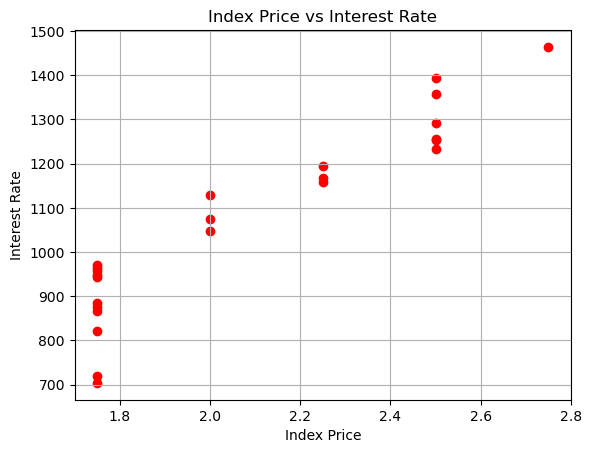

In [222]:
plt.scatter(interest, index_price, color = 'red')
plt.title("Index Price vs Interest Rate")
plt.xlabel("Index Price")
plt.ylabel("Interest Rate")
plt.grid()
plt.show()

### 데이터셋 나누기

In [223]:
from sklearn.model_selection import train_test_split

train_interest, test_interest, train_index, test_index = train_test_split(
    interest, index_price, random_state=42
)

train_interest = train_interest.reshape(-1, 1)
test_interest = test_interest.reshape(-1, 1)

### 선형 회귀

In [224]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_interest, train_index)

print("Interest Rate vs Index Price")
print(f"coef_: {lr.coef_}, intercept_: {lr.intercept_}")
print(f"train data score: {lr.score(train_interest, train_index)}")
print(f"test data score: {lr.score(test_interest, test_index)}")

Interest Rate vs Index Price
coef_: [574.45637584], intercept_: -127.38255033557039
train data score: 0.8541859618501457
test data score: 0.9418923929450573


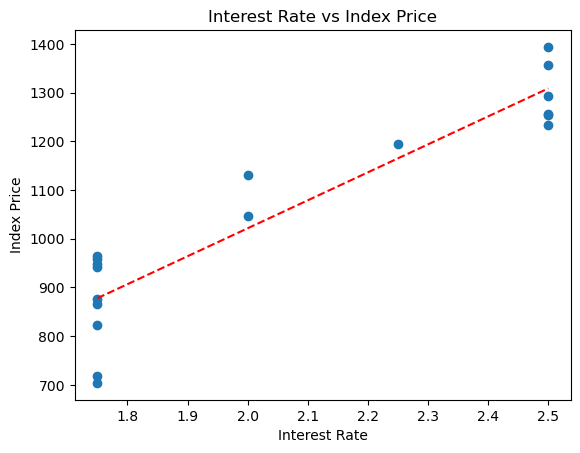

In [225]:
plt.scatter(train_interest, train_index)
plt.plot(
    [min(train_interest), max(train_interest)],
    [lr.coef_ * min(train_interest) + lr.intercept_, lr.coef_ * max(train_interest) + lr.intercept_],
    color = "red",
    linestyle = "--"
)
plt.title("Interest Rate vs Index Price")
plt.xlabel("Interest Rate")
plt.ylabel("Index Price")

plt.show()

### 다항 회귀

In [226]:
train_interest_poly = np.column_stack((train_interest**2, train_interest))
test_interest_poly = np.column_stack((test_interest**2, test_interest))

lr.fit(train_interest_poly, train_index)

print("이자율과 물가지수 다항 회귀")
print(f"다항 회귀 coef_: {lr.coef_}, intercept_: {lr.intercept_}")
print(f"다항 회귀 train data score: {lr.score(train_interest_poly, train_index)}")
print(f"다항 회귀 train data score: {lr.score(test_interest_poly, test_index)}")

이자율과 물가지수 다항 회귀
다항 회귀 coef_: [-524.84946237 2802.42473118], intercept_: -2429.1028225806535
다항 회귀 train data score: 0.8676269364555872
다항 회귀 train data score: 0.7945265214367347


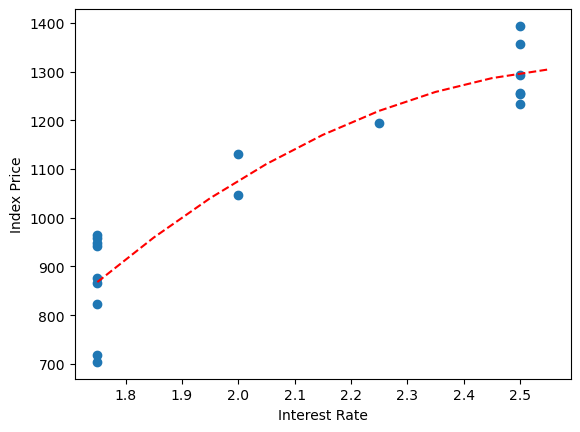

In [227]:
point = np.arange(float(min(train_interest)), float(max(train_interest)) + 0.1, step=0.1)

plt.scatter(train_interest, train_index)
plt.plot(
    point,
    (-524.8 * (point**2)) + (2802.4 * point) - 2429,
    color = "red",
    linestyle = "--"
)

plt.xlabel("Interest Rate")
plt.ylabel("Index Price")

plt.show()


## 실업률과 물가지수 상관 관계 분석

### 선형 회귀

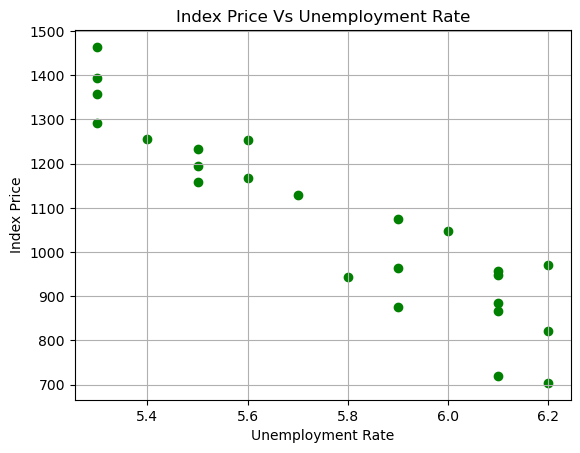

In [228]:
plt.scatter(unemployment, index_price, color = "green")

plt.title("Index Price Vs Unemployment Rate")
plt.xlabel("Unemployment Rate")
plt.ylabel("Index Price")
plt.grid()

plt.show()

In [229]:
from sklearn.model_selection import train_test_split

train_unemploy, test_unemploy, train_index, test_index = train_test_split(
    unemployment, index_price, random_state=42
)

train_unemploy = train_unemploy.reshape(-1, 1)
test_unemploy = test_unemploy.reshape(-1, 1)

In [230]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_unemploy, train_index)

print("Unemployment Rate vs Index Price")
print(f"coef_: {lr.coef_}, intercept_: {lr.intercept_}")
print(f"train data score: {lr.score(train_unemploy, train_index)}")
print(f"test data score: {lr.score(test_unemploy, test_index)}")

Unemployment Rate vs Index Price
coef_: [-611.41330166], intercept_: 4586.054631828979
train data score: 0.8748908875163574
test data score: 0.7074751133772279


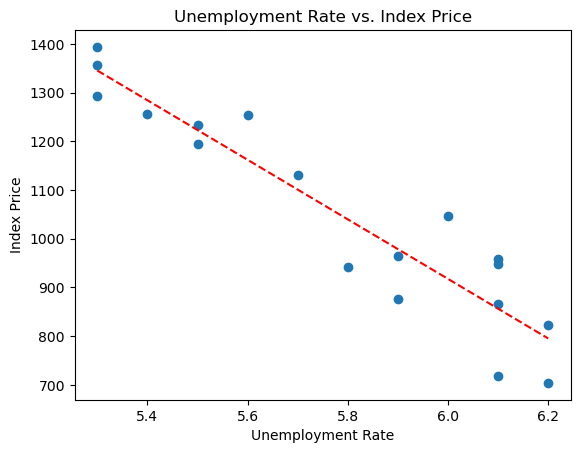

In [231]:
plt.scatter(train_unemploy, train_index)

plt.plot(
    [min(unemployment), max(unemployment)],
    [lr.coef_ * min(unemployment) + lr.intercept_, lr.coef_ * max(unemployment) + lr.intercept_],
    color = "red",
    linestyle = "--"
)

plt.title("Unemployment Rate vs. Index Price")
plt.xlabel("Unemployment Rate")
plt.ylabel("Index Price")

plt.show()

### 다항 회귀

In [235]:
train_unemploy_poly = np.column_stack((train_unemploy**2, train_unemploy))
test_unemploy_poly = np.column_stack((test_unemploy**2, test_unemploy))

lr.fit(train_unemploy_poly, train_index)

print("실업률과 물가지수 다항 회귀")
print(f"다항 회귀 coef_: {lr.coef_}, intercept_: {lr.intercept_}")
print(f"다항 회귀 train data score: {lr.score(train_unemploy_poly, train_index)}")
print(f"다항 회귀 train data score: {lr.score(test_unemploy_poly, test_index)}")

실업률과 물가지수 다항 회귀
다항 회귀 coef_: [  -7.26428138 -527.97932022], intercept_: 4347.248197109282
다항 회귀 train data score: 0.8748971920999006
다항 회귀 train data score: 0.7057073065929044


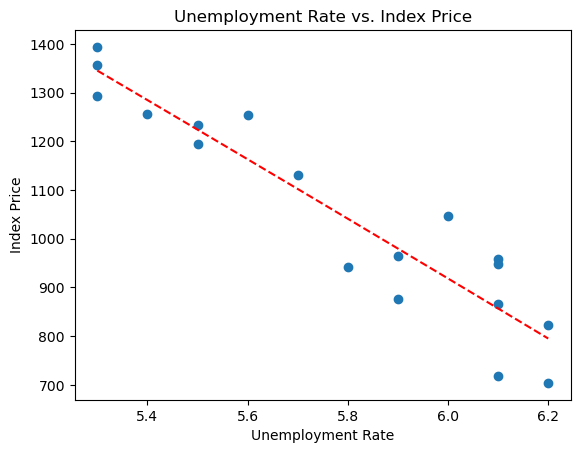

In [238]:
point = np.arange(float(min(train_unemploy)), float(max(train_unemploy)) + 0.1, step=0.1)

plt.scatter(train_unemploy, train_index)
plt.plot(
    point,
    (-7.26 * (point**2)) + (-527.9 * point) + 4347.2,
    color = "red",
    linestyle = "--"
)

plt.title("Unemployment Rate vs. Index Price")
plt.xlabel("Unemployment Rate")
plt.ylabel("Index Price")

plt.show()